<a href="https://colab.research.google.com/github/salil82/dx601-final-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

wine_df = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz', sep='\t')
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# YOUR CODE HERE

wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

YOUR ANSWERS HERE

* fixed acidity: non-volatile acids in the wine, which
contribute to the tartness of the wine
* volatile acidity: volatile acids in the wine. if it's too high, the wine could be spoiled and taste like vinegar
* citric acid: one of the three predominant acids in wine
* residual sugar: sugar from the grapes left over after fermenentation
* chlorides: amount of salt, sodium chloride, in the wine
* free sulfur dioxide: available SO2 in wine to protect against oxidation and spoilage
* total sulfur dioxide: free plus bound SO2
* density: related to alcohol and sugar content;
* pH: acidity of the wine. most wines have a pH between 3-4
* sulphates: help preserve the wine
* alcohol: alcohol content of the wine, usually measured by volume
* target: wine quality on a scale of 0 to 10

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

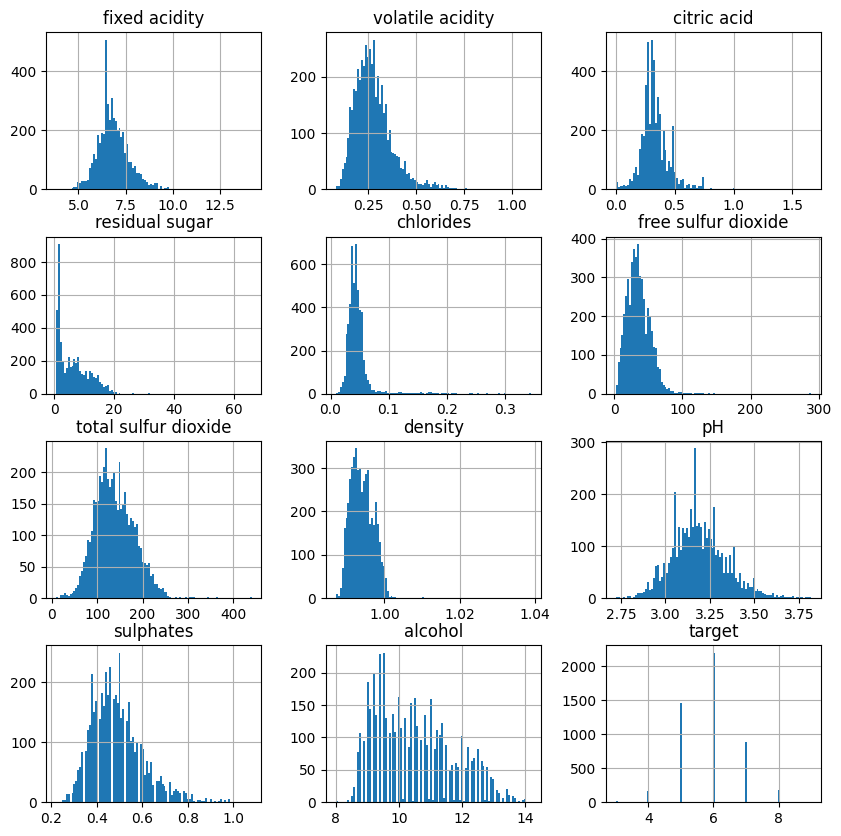

In [6]:
# YOUR CODE HERE

wine_df.hist(bins=100, figsize=(10, 10))
plt.show()

YOUR ANSWERS HERE

*   **fixed acidity**: this looks mostly symmetrical and only slightly positively skewed
*   **volatile acidity**: very positively skewed
*   **citric acid**: positively skewed
*   **residual sugar**: very positively skewed
*   **chlorides**: very positively skewed
*   **free SO2**: somewhat positively skewed
*   **total SO2**: somewhat positively skewed
*   **density**: mostly symmetrical, normal distribution
*   **pH**: mostly symmetrical, normal distribution
*   **sulphates**: positively skewed
*   **alcohol**: very positively skewed
*   **target**: appears mostly symmetrical, normal distribution

YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

<Axes: xlabel='alcohol', ylabel='target'>

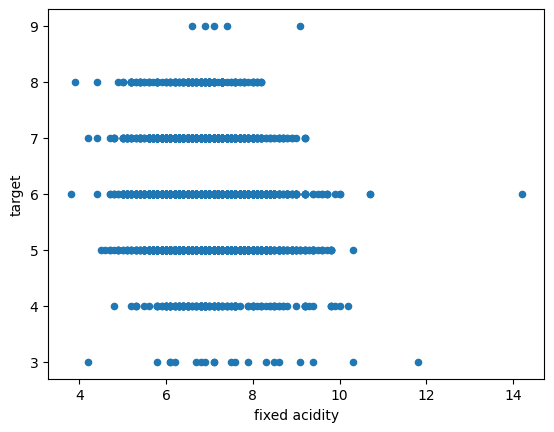

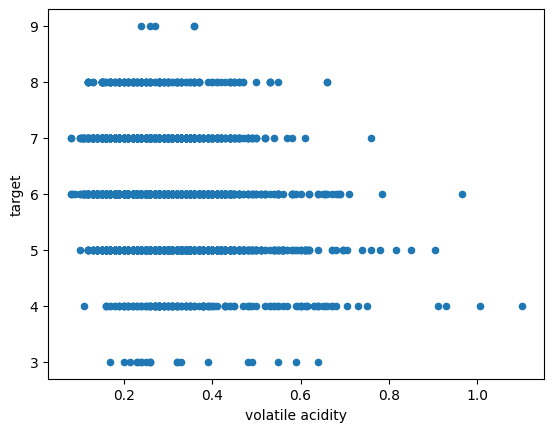

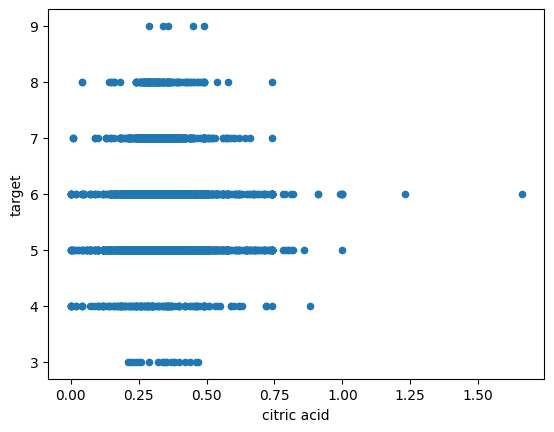

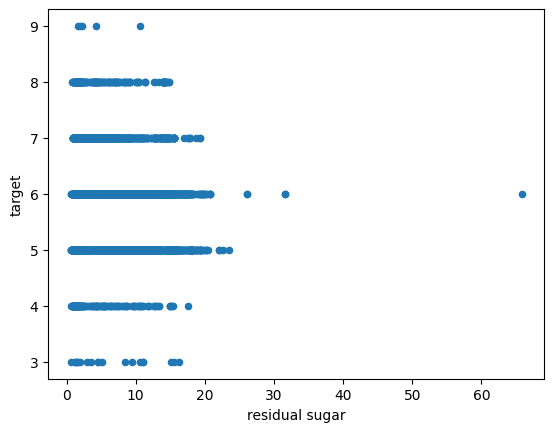

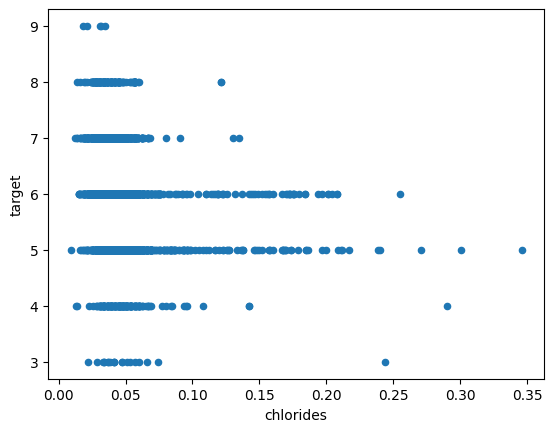

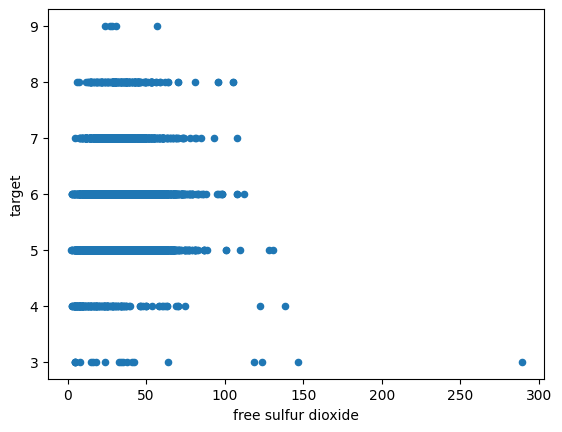

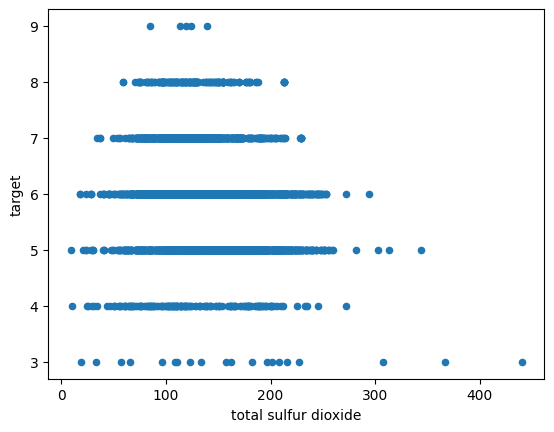

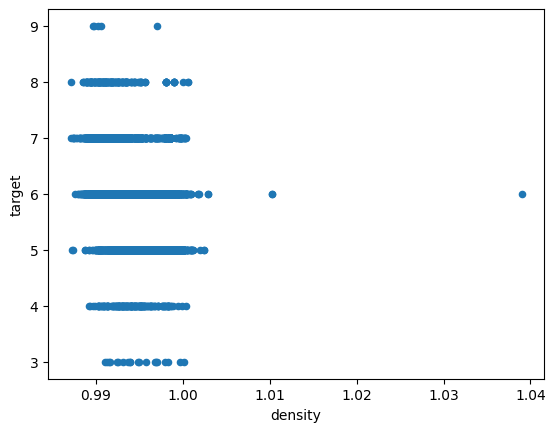

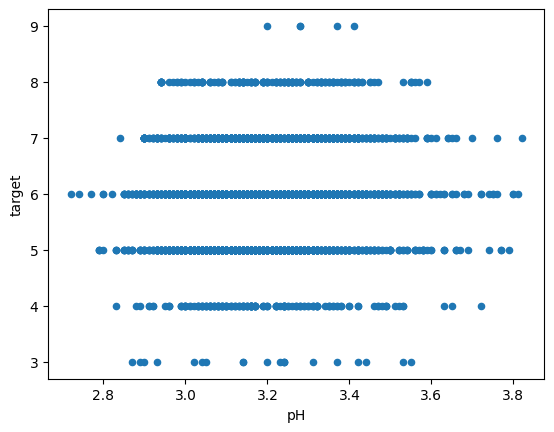

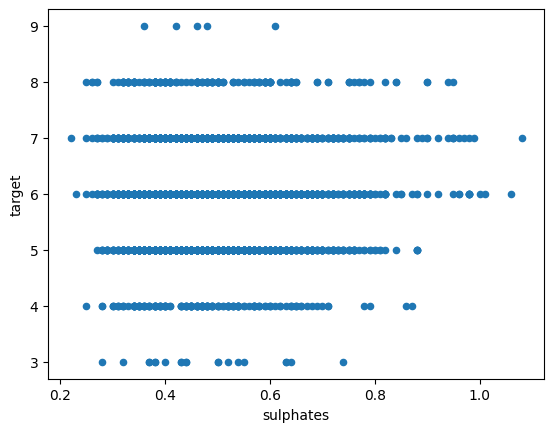

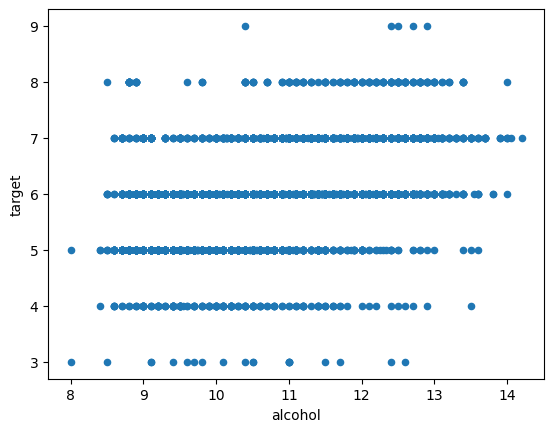

In [8]:
# YOUR CODE HERE

wine_df.plot(x='fixed acidity', y='target', kind='scatter')
wine_df.plot(x='volatile acidity', y='target', kind='scatter')
wine_df.plot(x='citric acid', y='target', kind='scatter')
wine_df.plot(x='residual sugar', y='target', kind='scatter')
wine_df.plot(x='chlorides', y='target', kind='scatter')
wine_df.plot(x='free sulfur dioxide', y='target', kind='scatter')
wine_df.plot(x='total sulfur dioxide', y='target', kind='scatter')
wine_df.plot(x='density', y='target', kind='scatter')
wine_df.plot(x='pH', y='target', kind='scatter')
wine_df.plot(x='sulphates', y='target', kind='scatter')
wine_df.plot(x='alcohol', y='target', kind='scatter')


YOUR ANSWERS HERE

*   **fixed acidity**: independent. points are scattered with no clear trend
*   **volatile acidity**:
*   **citric acid**:
*   **residual sugar**:
*   **chlorides**:
*   **free SO2**:
*   **total SO2**:
*   **density**:
*   **pH**:
*   **sulphates**:
*   **alcohol**:

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them.

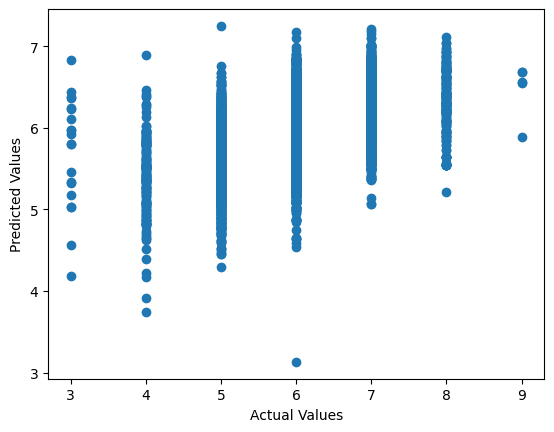

Mean Squared Error: 0.5631540629886564


In [9]:
# YOUR CODE HERE

X = wine_df.drop('target', axis=1)
y = wine_df['target']

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mse = np.mean((y - y_pred)**2)

plt.scatter(y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print('Mean Squared Error:', mse)

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [12]:
input_columns = [col for col in wine_df.columns if col != 'target']
output_column = 'target'

mse_results = {}

for col in input_columns:
    X_single = wine_df[[col]]
    y = wine_df[output_column]

    model_single = sklearn.linear_model.LinearRegression()
    model_single.fit(X_single, y)

    y_pred_single = model_single.predict(X_single)
    mse_single = np.mean((y - y_pred_single)**2)

    mse_results[col] = mse_single

mse_results

{'fixed acidity': np.float64(0.774064337751404),
 'volatile acidity': np.float64(0.7544611777913112),
 'citric acid': np.float64(0.7841290419696332),
 'residual sugar': np.float64(0.7767290354362436),
 'chlorides': np.float64(0.7496341230508563),
 'free sulfur dioxide': np.float64(0.7841433561228635),
 'total sulfur dioxide': np.float64(0.7602516302012771),
 'density': np.float64(0.7102265148403777),
 'pH': np.float64(0.776443165059832),
 'sulphates': np.float64(0.7819360335229565),
 'alcohol': np.float64(0.6354137863260801)}

In [13]:
best_column = min(mse_results, key=mse_results.get)
best_column

'alcohol'

YOUR ANSWERS HERE

The alcohol column gives the best linear model of the target on its own because it has the lowest mean squared error. However, that is still higher than the mean squared error from Problem 5 where we used all the input columns in our model. Therefore the model in Problem 5 using all input columns is still better than just using alcohol as the single input.

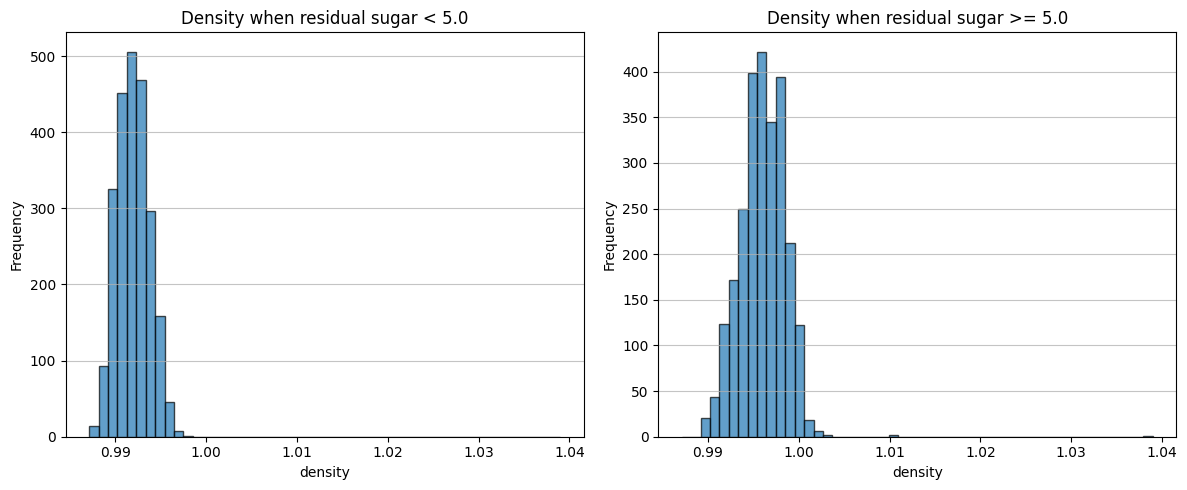

In [16]:
# Define the columns for analysis
col_to_split = 'residual sugar'
col_to_hist = 'density'

# Determine a threshold for 'residual sugar'
# A common practice is to pick a value that splits the data into meaningful groups
# Based on the scatter plot and general distribution, let's try 5 (median is ~5.2)
threshold = 5.0

# Create two subsets based on the threshold
df_low_rs = wine_df[wine_df[col_to_split] < threshold]
df_high_rs = wine_df[wine_df[col_to_split] >= threshold]

# Determine the common x-axis range for both histograms for fair comparison
min_val = wine_df[col_to_hist].min()
max_val = wine_df[col_to_hist].max()

bins = 50 # Number of bins for the histograms

plt.figure(figsize=(12, 5))

# Histogram for lower residual sugar group
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.hist(df_low_rs[col_to_hist], bins=bins, range=(min_val, max_val), edgecolor='black', alpha=0.7)
plt.title(f'Density when {col_to_split} < {threshold}')
plt.xlabel(col_to_hist)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for higher residual sugar group
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.hist(df_high_rs[col_to_hist], bins=bins, range=(min_val, max_val), edgecolor='black', alpha=0.7)
plt.title(f'Density when {col_to_split} >= {threshold}')
plt.xlabel(col_to_hist)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

In [14]:
input_cols = wine_df.drop('target', axis=1).columns
correlation_matrix = wine_df[input_cols].corr()

# Find the pair with the highest absolute correlation
# Exclude self-correlations (diagonal) and duplicate pairs
max_corr = 0
correlated_pair = ('', '')

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)): # Only check upper triangle
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_val = correlation_matrix.loc[col1, col2]
        if abs(corr_val) > abs(max_corr):
            max_corr = corr_val
            correlated_pair = (col1, col2)

print(f"The pair of input columns with the highest absolute correlation is: {correlated_pair[0]} and {correlated_pair[1]} (Correlation: {max_corr:.4f})")

# Display the full correlation matrix for reference
display(correlation_matrix)

The pair of input columns with the highest absolute correlation is: residual sugar and density (Correlation: 0.8390)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

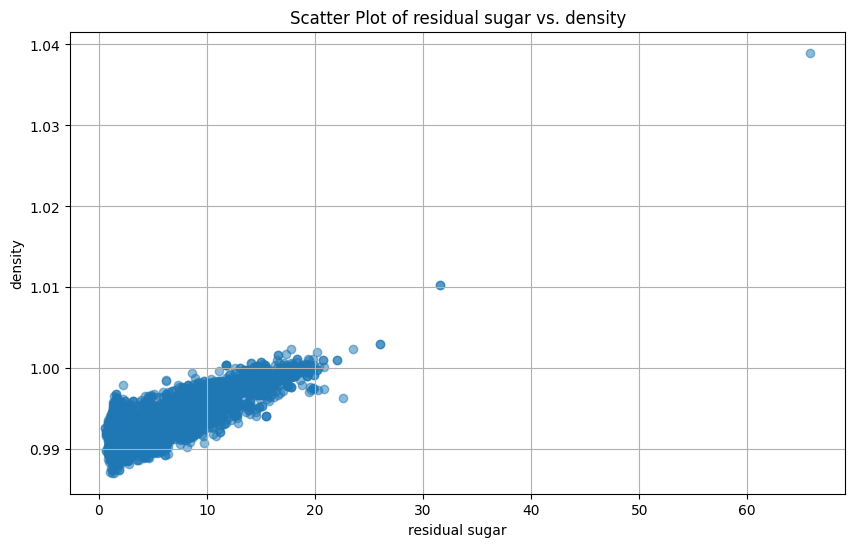

In [15]:
# Pick the pair of input columns with the highest correlation: residual sugar and density
col_x = 'residual sugar'
col_y = 'density'

# Plot the pair of input columns with a visible dependency
plt.figure(figsize=(10, 6))
plt.scatter(wine_df[col_x], wine_df[col_y], alpha=0.5)
plt.title(f'Scatter Plot of {col_x} vs. {col_y}')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again.

This problem depends on material from week 13.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE
# if 11 features, n component is 6?

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [ ]:
# YOUR CODE HERE
# use z-score? median z-score for each row?
# distances = np.sqrt(pc1**2 + pc2**2)
# index where the max is the row of the outlier. the sample farthest from the center
# Apoorva: z-scores for each column;

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE